In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
from IPython.display import Image

In [4]:
import GPy

In [5]:
import sys
sys.path.insert(0, './source')

In [6]:
from incremental_run import Data, loadData, compute_several_stats, RunFullGP, RunPoE, RunSparseGP

new attribute for sparse GP!!


In [7]:
from CPoE import CPoE

## create some data

In [8]:
kern = GPy.kern.RBF(input_dim = 2, variance = 1.1, lengthscale = 0.2, ARD = True)

In [9]:
lik = GPy.likelihoods.Gaussian(variance=0.01)

In [10]:
DD = Data(kern=kern, sig2_noise=0.01, Ntrain=2**11, Ntest=2**10, name='', UNIF=False, GRID=True)
# can take some time, since it data sampled from a full GP

76.5625% test data points IN
timeData  13.708523511886597


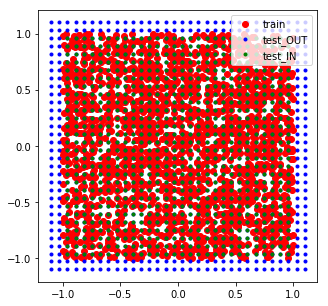

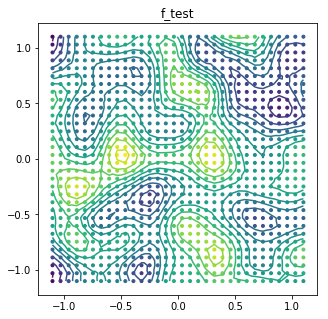

In [11]:
DD.plot_data(figsize=(10,6))

## run full GP as comparison

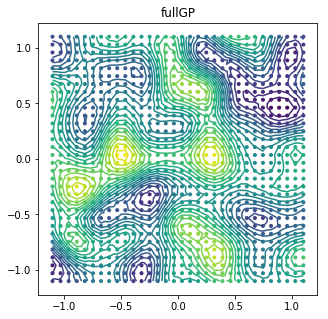

In [12]:
rFullGP = RunFullGP(DD, kern, likelihood=lik ).run()
rFullGP.plot_full()

In [13]:
# some statistics computed for test data
# IN/OUT indicates the performence in or outside the regions where training data is available
rFullGP.compute_stats() 

,time,lik,CRPS,errF,errAbs,negLogP,cov,CRPS_IN,errF_IN,errAbs_IN,negLogP_IN,cov_IN,CRPS_OUT,errF_OUT,errAbs_OUT,negLogP_OUT,cov_OUT
fullGP,1.118,1363.132,0.078,0.122,0.055,-2.112,0.945,0.06,0.03,0.024,-2.597,0.946,0.136,0.245,0.157,-0.529,0.942


## run CPoE algorithm with different degree of correaltions

In [43]:
J = 16           # number of experts
Cs = [1,2,3,4]     # degrees of correlation
gamma = 0.75        # sparsity parameter

In [49]:
RES1, MOD1 = CPoE(DD.X_train, DD.y_train, kern, lik, J, Cs[0], gamma, \
                y_test=DD.y_test, X_test=DD.X_test, f_test=DD.f_test)

In [50]:
RES2, MOD2 = CPoE(DD.X_train, DD.y_train, kern, lik, J, Cs[1], gamma, \
                y_test=DD.y_test, X_test=DD.X_test, f_test=DD.f_test)

In [51]:
RES3, MOD3 = CPoE(DD.X_train, DD.y_train, kern, lik, J, Cs[2], gamma, \
                y_test=DD.y_test, X_test=DD.X_test, f_test=DD.f_test)

In [52]:
RES4, MOD4 = CPoE(DD.X_train, DD.y_train, kern, lik, J, Cs[3], gamma, \
                y_test=DD.y_test, X_test=DD.X_test, f_test=DD.f_test)

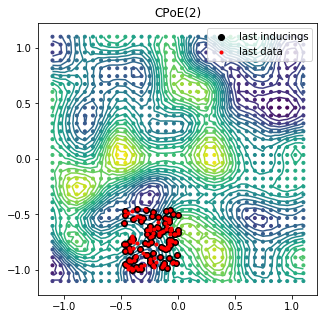

In [53]:
RES2.plot_bgp( );

In [55]:
compute_several_stats( [RES1,RES2,RES3,RES4], mFull=rFullGP.m, vFull=rFullGP.v)

,time,lik,KLx1000,errFull,CRPS,errF,errAbs,negLogP,cov
CPoE(1),0.249,1097.977,40.648,0.049,0.081,0.126,0.062,-1.971,0.951
CPoE(2),0.556,1249.742,13.325,0.028,0.079,0.124,0.058,-2.050,0.948
CPoE(3),0.617,1252.334,3.951,0.019,0.078,0.121,0.056,-2.083,0.945
CPoE(4),0.923,1283.860,2.710,0.017,0.078,0.121,0.056,-2.089,0.945


In [56]:
# consider in particular the column KL to full GP

## predecessor structures and sparse F matrix

In [86]:
# show predecessor structure of matrix F
MOD1.compute_F()
MOD2.compute_F()
MOD3.compute_F()
MOD4.compute_F()

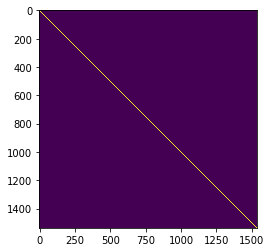

In [87]:
plt.imshow( np.abs( MOD1.F ) > 1e-20 );

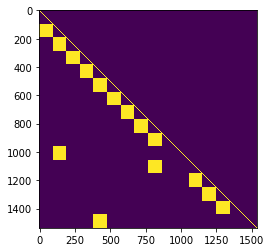

In [88]:
plt.imshow( np.abs( MOD2.F ) > 1e-20 );

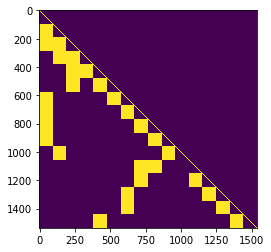

In [89]:
plt.imshow( np.abs( MOD3.F ) > 1e-20 );

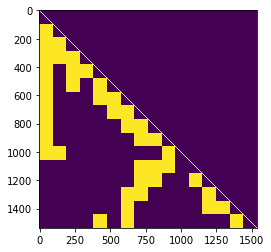

In [90]:
plt.imshow( np.abs( MOD4.F ) > 1e-20 );

In [91]:
# generate visualization for predecesor structure
#MOD1.plot_predecessors(name='MOD1')
#MOD2.plot_predecessors(name='MOD2')
#MOD3.plot_predecessors(name='MOD3')
#MOD4.plot_predecessors(name='MOD4')

In [92]:
# show the visualizations (precomputed)

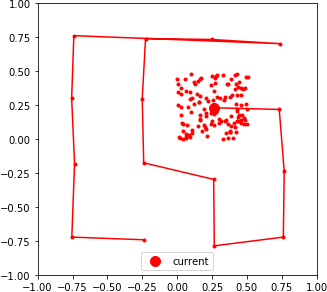

In [93]:
Image('GIF_PART/part_MOD1.gif')

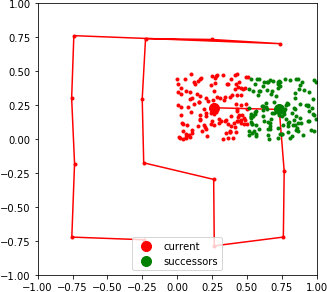

In [94]:
Image('GIF_PART/part_MOD2.gif')

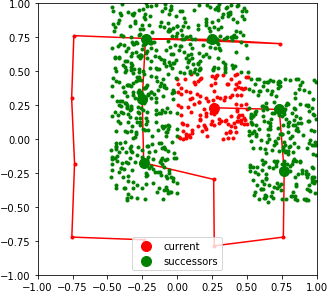

In [95]:
Image('GIF_PART/part_MOD3.gif')

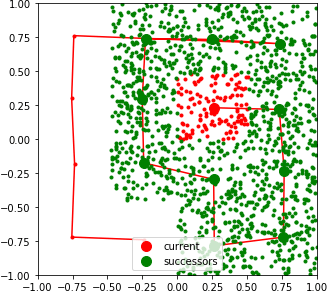

In [96]:
Image('GIF_PART/part_MOD4.gif')